In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
# import libpysal.weights.set_operations as Wsets
# from libpysal.weights import Queen, KNN
import matplotlib.pyplot as plt
# Open raw (unprocessed) dataset (raw census data)
path = r'C:/Users/Jared/Dropbox/STUDY/Semester2/ML/Project/lscd.csv'
df = pd.read_csv(path)

In [2]:
# Check dataset headers
df.head()
# Print name of columns, which will be used for clustering
for col in df.columns:
    print(col)

OA
k001_PCT
k002_PCT
k003_PCT
k004_PCT
k005_PCT
k006_PCT
k007_RATIO
k008_PCT
k009_PCT
k010_PCT
k011_PCT
k012_PCT
k013_PCT
k014_PCT
k015_PCT
k016_PCT
k017_PCT
k018_PCT
k019_PCT
k020_PCT
k021_PCT
k022_PCT
k023_PCT
k024_PCT
k025_PCT
k026_PCT
k027_PCT
k028_PCT
k029_PCT
k030_PCT
k031_PCT
k032_PCT
k033_PCT
k034_PCT
k035_RATIO
k036_PCT
k037_PCT
k038_PCT
k039_PCT
k040_PCT
k041_PCT
k042_PCT
k043_PCT
k044_PCT
k045_PCT
k046_PCT
k047_PCT
k048_PCT
k049_PCT
k050_PCT
k051_PCT
k052_PCT
k053_PCT
k054_PCT
k055_PCT
k056_PCT
k057_PCT
k058_PCT
k059_PCT
k060_PCT


In [3]:
df.describe() # data investigation

,k001_PCT,k002_PCT,k003_PCT,k004_PCT,k005_PCT,k006_PCT,k007_RATIO,k008_PCT,k009_PCT,k010_PCT,...,k051_PCT,k052_PCT,k053_PCT,k054_PCT,k055_PCT,k056_PCT,k057_PCT,k058_PCT,k059_PCT,k060_PCT
count,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,...,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000
mean,0.641684,0.707470,0.794843,0.804916,0.562638,0.094603,0.475044,0.045306,0.619897,0.840987,...,0.178014,0.721686,0.505270,0.548614,0.730875,0.578773,0.576134,0.431773,0.614580,0.586694
std,0.110625,0.130594,0.069501,0.070901,0.129298,0.113678,0.079349,0.147087,0.131943,0.070277,...,0.187462,0.093279,0.174894,0.166104,0.125037,0.134642,0.125650,0.117570,0.092245,0.081264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.582274,0.657844,0.750909,0.770634,0.498177,0.000000,0.437683,0.000000,0.530501,0.796586,...,0.000000,0.666087,0.403469,0.447344,0.646987,0.496600,0.505273,0.369443,0.566468,0.543563
50%,0.653091,0.736098,0.793896,0.813506,0.575978,0.067458,0.481625,0.000000,0.627831,0.848809,...,0.175667,0.732182,0.529275,0.564062,0.737282,0.577384,0.586709,0.447151,0.626220,0.594512
75%,0.715548,0.792400,0.840683,0.851794,0.646634,0.141239,0.523587,0.000000,0.717769,0.894551,...,0.304904,0.787577,0.628000,0.667403,0.830588,0.664167,0.662064,0.513013,0.676978,0.639784
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Check for null values
print(df.isnull().sum())
# No null found across the dataset
# Potential null in dataset could be replaced by mean values for each variable

OA          0
k001_PCT    0
k002_PCT    0
k003_PCT    0
k004_PCT    0
           ..
k056_PCT    0
k057_PCT    0
k058_PCT    0
k059_PCT    0
k060_PCT    0
Length: 61, dtype: int64


In [5]:
# Selecting proper subset of data without AOI id
df0 = df.iloc[:,1:]
df0

,k001_PCT,k002_PCT,k003_PCT,k004_PCT,k005_PCT,k006_PCT,k007_RATIO,k008_PCT,k009_PCT,k010_PCT,...,k051_PCT,k052_PCT,k053_PCT,k054_PCT,k055_PCT,k056_PCT,k057_PCT,k058_PCT,k059_PCT,k060_PCT
0,0.606376,0.503031,0.703821,0.926061,0.762889,0.204636,0.585630,0.0,0.433226,0.926264,...,0.000000,0.406396,0.000000,0.335744,0.924542,0.771288,0.347596,0.547130,0.655963,0.581193
1,0.603327,0.619334,0.762261,0.935805,0.653767,0.088382,0.654158,0.0,0.458268,0.932451,...,0.223704,0.477448,0.266650,0.344169,0.973796,0.749651,0.356319,0.384675,0.644212,0.412564
2,0.430039,0.555673,0.801682,0.918393,0.693939,0.061004,0.621413,0.0,0.609051,0.869016,...,0.000000,0.521265,0.180781,0.477544,0.930813,0.791375,0.400594,0.422791,0.630002,0.415685
3,0.525310,0.448800,0.879144,0.871354,0.315906,0.000000,0.314608,0.0,0.789458,0.807999,...,0.348662,0.555671,0.237254,0.621786,0.876786,0.924662,0.000000,0.444881,0.211712,0.437404
4,0.516634,0.205410,0.859430,0.884819,0.670370,0.323121,0.618241,0.0,0.844328,0.620437,...,0.456328,0.589938,0.462821,0.548348,0.861803,0.633669,0.471683,0.518480,0.497071,0.454438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,0.668491,0.583719,0.927328,0.677729,0.439736,0.153410,0.541190,0.0,0.703678,0.838396,...,0.312305,0.475222,0.212514,0.624905,0.870867,0.755440,0.445596,0.512185,0.619690,0.531222
25049,0.815300,0.658022,0.920489,0.528601,0.309879,0.000000,0.513089,0.0,0.787519,0.810948,...,0.239490,0.648942,0.366451,0.277441,0.850513,0.781530,0.533848,0.513733,0.660739,0.560752
25050,0.813399,0.894542,0.809166,0.759503,0.296238,0.000000,0.388428,0.0,0.490608,0.868601,...,0.197439,0.714918,0.615219,0.466063,0.635240,0.631388,0.578778,0.527566,0.567359,0.737556
25051,0.570961,0.775606,0.659016,0.920811,0.676941,0.000000,0.404478,0.0,0.475431,0.926068,...,0.259299,0.628772,0.176445,0.380691,0.857743,0.719545,0.394130,0.146406,0.665710,0.634580


In [6]:
# Data standardisation
pca = PCA(60)
df1 = pca.fit_transform(df0)
df2 = pd.DataFrame(df1)
df1

array([[-2.53752965e-01,  1.31584034e+00,  4.22728487e-01, ...,
        -1.44358705e-02,  2.88291009e-02, -2.18978630e-02],
       [-1.66933612e-01,  1.07322453e+00, -6.76090931e-02, ...,
        -7.86494106e-03, -2.36030078e-02, -1.33666575e-02],
       [-4.91313607e-01,  1.25171476e+00,  7.09036891e-02, ...,
        -5.57299218e-02,  1.92271410e-02, -8.19521536e-03],
       ...,
       [ 1.86522451e-01, -2.54852060e-01,  2.88631693e-01, ...,
         1.74577178e-02, -1.17520656e-02, -1.05699036e-03],
       [ 6.08844121e-01,  5.82106286e-01,  1.76759524e-01, ...,
         4.10005221e-02,  3.52777975e-02, -1.21006411e-02],
       [-7.33507409e-01,  2.14173754e-01, -2.85099162e-01, ...,
        -4.10999645e-03,  1.77839455e-02,  3.22107858e-03]])

In [8]:
# Calculate correlation matrix
kor0 = df0
kor = kor0.corr()
# Replace 1 with 0
kort = kor.iloc[:20,:20]
# Table is too big and hard to handle, hence I will perform selection
korl = kort.unstack()
korls = korl.sort_values(kind="quicksort", ascending=False)
# Check from the biggest to the smallest correlations
korls.to_csv('C:/Users/Jared/Dropbox/STUDY/Semester2/ML/Project/corr.csv')
kort

,k001_PCT,k002_PCT,k003_PCT,k004_PCT,k005_PCT,k006_PCT,k007_RATIO,k008_PCT,k009_PCT,k010_PCT,k011_PCT,k012_PCT,k013_PCT,k014_PCT,k015_PCT,k016_PCT,k017_PCT,k018_PCT,k019_PCT,k020_PCT
k001_PCT,1.000000,0.426788,0.131770,-0.161533,-0.239978,-0.174535,0.127137,-0.174582,-0.059483,0.193280,0.248208,-0.254549,0.212283,0.004488,0.144509,0.134684,0.025427,0.306799,0.064364,-0.055500
k002_PCT,0.426788,1.000000,-0.468386,0.289674,0.135416,-0.058378,-0.108594,-0.155416,-0.399102,0.414820,0.195989,-0.279471,0.048137,0.011848,0.147896,0.180424,-0.067573,0.288403,-0.010705,0.166859
k003_PCT,0.131770,-0.468386,1.000000,-0.594056,-0.628021,-0.336819,0.401446,-0.054640,0.701672,-0.466255,0.005631,-0.040825,0.290095,-0.027510,-0.001938,0.049609,0.182405,0.106822,0.206808,-0.413758
k004_PCT,-0.161533,0.289674,-0.594056,1.000000,0.608706,0.170484,-0.371493,-0.108713,-0.556080,0.510904,0.078776,0.217721,-0.222181,-0.013970,-0.091744,-0.232989,-0.192253,-0.217277,-0.212325,0.402277
k005_PCT,-0.239978,0.135416,-0.628021,0.608706,1.000000,0.495162,-0.368073,0.034017,-0.596751,0.409208,0.034629,0.256576,-0.318492,0.011715,-0.075219,-0.190025,-0.194353,-0.306667,-0.203711,0.375856
k006_PCT,-0.174535,-0.058378,-0.336819,0.170484,0.495162,1.000000,-0.213748,0.275892,-0.327572,0.122175,0.028116,0.210211,-0.195730,-0.002507,-0.075751,-0.135351,-0.113022,-0.216802,-0.118500,0.211899
k007_RATIO,0.127137,-0.108594,0.401446,-0.371493,-0.368073,-0.213748,1.000000,-0.071378,0.471703,-0.401393,0.122679,-0.255833,0.254469,-0.115006,0.008901,0.232992,0.121952,0.285227,0.266339,-0.361089
k008_PCT,-0.174582,-0.155416,-0.054640,-0.108713,0.034017,0.275892,-0.071378,1.000000,0.088914,-0.173562,-0.081484,0.033193,-0.002188,0.035499,0.005766,-0.017092,0.036712,-0.020572,0.016182,-0.032546
k009_PCT,-0.059483,-0.399102,0.701672,-0.556080,-0.596751,-0.327572,0.471703,0.088914,1.000000,-0.863912,0.159251,-0.059495,0.443472,-0.250041,-0.116288,0.143792,0.083075,0.370887,0.243277,-0.303005
k010_PCT,0.193280,0.414820,-0.466255,0.510904,0.409208,0.122175,-0.401393,-0.173562,-0.863912,1.000000,-0.324923,-0.008040,-0.394337,0.334456,0.207593,-0.086682,0.004525,-0.371708,-0.185866,0.175165


Text(0.5, 1.0, 'Correlation heatmap')

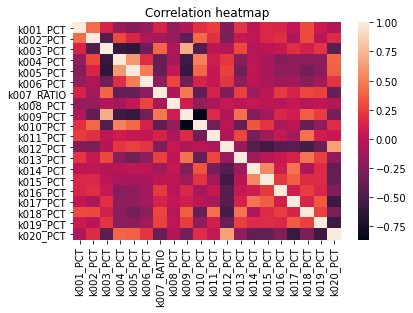

In [9]:
# Correlation heatmap
sns.heatmap(kort, 
        xticklabels=kort.columns,
        yticklabels=kort.columns).set_title('Correlation heatmap')

In [11]:
# To remove the following variables:
# k020, k039, k041, k004, k023 as these values are highly correlated
# As a rule of thumb, variables for which correlation coefficient is 
# very high are considered to be highly correlated.
# In our case, we have 3 cases of highly correlated variables:
# k012 (% of people who are white) and 
# k020 (% of people born in the UK or Ireland)
# k039 (% of people aged over 16 whose highest level of qualification 
# is Level 4 qualifications and above) and 
# k055 (% of employed people between 16 and 74 who work in the information
# and communication or professional, scientific and technical activities
# industries)
# k031 (% of households who own or have shared ownership of property) and 
# k041 (% of households with two or more cars or van)
# Moreover, 2 variables that have a correlation higher than 0.7 with at least
# 2 other variables:
# k004 (Persons aged 45 to 64)
# k023 (% of people whose main language is not English and cannot 
# speak English well or at all)
# 'k004_PCT', 'k020_PCT', 'k023_PCT', 'k039_PCT', 'k041_PCT'
dff = df0.drop(columns = 
               ['k004_PCT', 'k020_PCT', 'k023_PCT', 'k039_PCT', 'k041_PCT'])
dff

,k001_PCT,k002_PCT,k003_PCT,k005_PCT,k006_PCT,k007_RATIO,k008_PCT,k009_PCT,k010_PCT,k011_PCT,...,k051_PCT,k052_PCT,k053_PCT,k054_PCT,k055_PCT,k056_PCT,k057_PCT,k058_PCT,k059_PCT,k060_PCT
0,0.606376,0.503031,0.703821,0.762889,0.204636,0.585630,0.0,0.433226,0.926264,0.656157,...,0.000000,0.406396,0.000000,0.335744,0.924542,0.771288,0.347596,0.547130,0.655963,0.581193
1,0.603327,0.619334,0.762261,0.653767,0.088382,0.654158,0.0,0.458268,0.932451,0.434535,...,0.223704,0.477448,0.266650,0.344169,0.973796,0.749651,0.356319,0.384675,0.644212,0.412564
2,0.430039,0.555673,0.801682,0.693939,0.061004,0.621413,0.0,0.609051,0.869016,0.669159,...,0.000000,0.521265,0.180781,0.477544,0.930813,0.791375,0.400594,0.422791,0.630002,0.415685
3,0.525310,0.448800,0.879144,0.315906,0.000000,0.314608,0.0,0.789458,0.807999,0.531193,...,0.348662,0.555671,0.237254,0.621786,0.876786,0.924662,0.000000,0.444881,0.211712,0.437404
4,0.516634,0.205410,0.859430,0.670370,0.323121,0.618241,0.0,0.844328,0.620437,0.752114,...,0.456328,0.589938,0.462821,0.548348,0.861803,0.633669,0.471683,0.518480,0.497071,0.454438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,0.668491,0.583719,0.927328,0.439736,0.153410,0.541190,0.0,0.703678,0.838396,0.628582,...,0.312305,0.475222,0.212514,0.624905,0.870867,0.755440,0.445596,0.512185,0.619690,0.531222
25049,0.815300,0.658022,0.920489,0.309879,0.000000,0.513089,0.0,0.787519,0.810948,0.523059,...,0.239490,0.648942,0.366451,0.277441,0.850513,0.781530,0.533848,0.513733,0.660739,0.560752
25050,0.813399,0.894542,0.809166,0.296238,0.000000,0.388428,0.0,0.490608,0.868601,0.839608,...,0.197439,0.714918,0.615219,0.466063,0.635240,0.631388,0.578778,0.527566,0.567359,0.737556
25051,0.570961,0.775606,0.659016,0.676941,0.000000,0.404478,0.0,0.475431,0.926068,0.618963,...,0.259299,0.628772,0.176445,0.380691,0.857743,0.719545,0.394130,0.146406,0.665710,0.634580


In [12]:
# Calculating optimal number of cluster by checking sswd
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=1000,
                random_state=42)
    km = km.fit(dff)
    Sum_of_squared_distances.append(km.inertia_)  

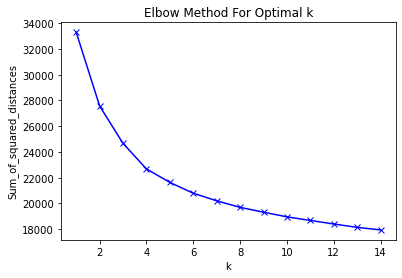

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
# Pre-plotting k-means clustering for 9 clusters
km = KMeans(n_clusters=9, n_init=10, max_iter=1000)
label = km.fit_predict(dff)
print(label)
km_labels = km.labels_
# Getting the Centroids
# centroids = km.cluster_centers_
# u2_labels = np.unique(u_labels)

[8 8 8 ... 0 4 2]


In [15]:
# getting labels for K-means method
km_c = pd.DataFrame(km_labels)
resultk = pd.concat([df, km_c], axis=1, join="inner")
resultk.rename(columns = {resultk.columns[61]:'KM_C'}, inplace = True) # column renaming
resultk
#km.n_iter_

,OA,k001_PCT,k002_PCT,k003_PCT,k004_PCT,k005_PCT,k006_PCT,k007_RATIO,k008_PCT,k009_PCT,...,k052_PCT,k053_PCT,k054_PCT,k055_PCT,k056_PCT,k057_PCT,k058_PCT,k059_PCT,k060_PCT,KM_C
0,E00000001,0.606376,0.503031,0.703821,0.926061,0.762889,0.204636,0.585630,0.0,0.433226,...,0.406396,0.000000,0.335744,0.924542,0.771288,0.347596,0.547130,0.655963,0.581193,8
1,E00000003,0.603327,0.619334,0.762261,0.935805,0.653767,0.088382,0.654158,0.0,0.458268,...,0.477448,0.266650,0.344169,0.973796,0.749651,0.356319,0.384675,0.644212,0.412564,8
2,E00000005,0.430039,0.555673,0.801682,0.918393,0.693939,0.061004,0.621413,0.0,0.609051,...,0.521265,0.180781,0.477544,0.930813,0.791375,0.400594,0.422791,0.630002,0.415685,8
3,E00000007,0.525310,0.448800,0.879144,0.871354,0.315906,0.000000,0.314608,0.0,0.789458,...,0.555671,0.237254,0.621786,0.876786,0.924662,0.000000,0.444881,0.211712,0.437404,8
4,E00000010,0.516634,0.205410,0.859430,0.884819,0.670370,0.323121,0.618241,0.0,0.844328,...,0.589938,0.462821,0.548348,0.861803,0.633669,0.471683,0.518480,0.497071,0.454438,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,E00176591,0.668491,0.583719,0.927328,0.677729,0.439736,0.153410,0.541190,0.0,0.703678,...,0.475222,0.212514,0.624905,0.870867,0.755440,0.445596,0.512185,0.619690,0.531222,4
25049,E00176592,0.815300,0.658022,0.920489,0.528601,0.309879,0.000000,0.513089,0.0,0.787519,...,0.648942,0.366451,0.277441,0.850513,0.781530,0.533848,0.513733,0.660739,0.560752,2
25050,E00176593,0.813399,0.894542,0.809166,0.759503,0.296238,0.000000,0.388428,0.0,0.490608,...,0.714918,0.615219,0.466063,0.635240,0.631388,0.578778,0.527566,0.567359,0.737556,0
25051,E00176594,0.570961,0.775606,0.659016,0.920811,0.676941,0.000000,0.404478,0.0,0.475431,...,0.628772,0.176445,0.380691,0.857743,0.719545,0.394130,0.146406,0.665710,0.634580,4


In [16]:
# Test accuracy of Clustering by Silhouette Coefficient
from sklearn import metrics
ss = metrics.silhouette_score(dff, km_labels, metric='euclidean')
ss
#Sum_of_squared_distances = []
#K = range(1,15)
#for k in K:
#    ss = metrics.silhouette_score(dff, km_labels, metric='euclidean')
#    Sum_of_squared_distances.append(ss)  
#    
#plt.plot(K, Sum_of_squared_distances, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Sum_of_squared_distances')
#plt.title('Elbow Method For Optimal k')
#plt.show()

0.08510760434849582

In [17]:
# Counting and summarising numbers of clusters across dataset
unique, counts = np.unique(km_labels, return_counts=True)
dict(zip(unique, counts))

{0: 3376,
 1: 3072,
 2: 3211,
 3: 3121,
 4: 3096,
 5: 2248,
 6: 1830,
 7: 2815,
 8: 2284}

In [18]:
dfs = resultk.sample(n = 2500)  # setting lower number of samples to makes charts visible
dfs.head()
pc1 = 45 # first of attribute to display
pc11 = pc1 - 5 # moving centroid location to correct column
pc2 = 59 # second of attribute to display
pc22 = pc2 - 5 # moving centroid location to correct column
filtered_label1 = dfs.loc[dfs['KM_C'] == 1] # selecting labels
filtered_label2 = dfs.loc[dfs['KM_C'] == 2]
filtered_label3 = dfs.loc[dfs['KM_C'] == 3]
filtered_label4 = dfs.loc[dfs['KM_C'] == 4]
filtered_label5 = dfs.loc[dfs['KM_C'] == 5]
filtered_label6 = dfs.loc[dfs['KM_C'] == 6]
filtered_label7 = dfs.loc[dfs['KM_C'] == 7]
filtered_label8 = dfs.loc[dfs['KM_C'] == 8]
filtered_label9 = dfs.loc[dfs['KM_C'] == 9]
filtered_label11 = filtered_label1.iloc[:,pc1] # setting correct location
filtered_label12 = filtered_label1.iloc[:,pc2]
filtered_label21 = filtered_label2.iloc[:,pc1]
filtered_label22 = filtered_label2.iloc[:,pc2]
filtered_label31 = filtered_label3.iloc[:,pc1]
filtered_label32 = filtered_label3.iloc[:,pc2]
filtered_label41 = filtered_label4.iloc[:,pc1]
filtered_label42 = filtered_label4.iloc[:,pc2]
filtered_label51 = filtered_label5.iloc[:,pc1]
filtered_label52 = filtered_label5.iloc[:,pc2]
filtered_label61 = filtered_label6.iloc[:,pc1]
filtered_label62 = filtered_label6.iloc[:,pc2]
filtered_label71 = filtered_label7.iloc[:,pc1]
filtered_label72 = filtered_label7.iloc[:,pc2]
filtered_label81 = filtered_label8.iloc[:,pc1]
filtered_label82 = filtered_label8.iloc[:,pc2]
filtered_label91 = filtered_label9.iloc[:,pc1]
filtered_label92 = filtered_label9.iloc[:,pc2]

In [19]:
centroids = km.cluster_centers_ #centoids for k-means method
centroids

array([[0.68466162, 0.78645734, 0.76254103, 0.57745673, 0.10134954,
        0.45698732, 0.02940837, 0.6140223 , 0.83473762, 0.72617087,
        0.86382754, 0.61116143, 0.27453047, 0.18439791, 0.14814558,
        0.43126851, 0.70772431, 0.30295186, 0.30770819, 0.39804823,
        0.6350303 , 0.73889871, 0.0379184 , 0.3679176 , 0.6603196 ,
        0.79281181, 0.7409108 , 0.81704242, 0.7983922 , 0.60970314,
        0.67380223, 0.7184776 , 0.76162304, 0.84358088, 0.55372823,
        0.5596975 , 0.69823315, 0.79675254, 0.48433616, 0.62762096,
        0.69067394, 0.86056046, 0.01907396, 0.67379035, 0.51561196,
        0.2685332 , 0.76734263, 0.61687786, 0.56564362, 0.61137015,
        0.49917381, 0.61879807, 0.46870227, 0.62255898, 0.63898059],
       [0.68074429, 0.76549398, 0.79421464, 0.51914729, 0.07205512,
        0.54605144, 0.0366875 , 0.69828206, 0.78193264, 0.73435645,
        0.7861526 , 0.65239607, 0.22114922, 0.14639196, 0.32746534,
        0.47348185, 0.75822048, 0.46290673, 0.4

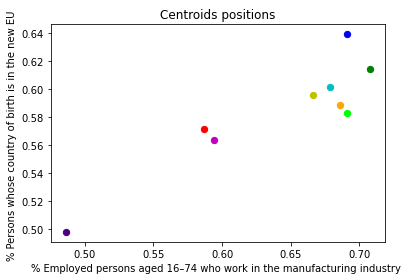

In [20]:
# Plotting centroids together
plt.scatter(centroids[0,pc11] , centroids[0,pc22], s = 40, color = 'b')
plt.scatter(centroids[1,pc11] , centroids[1,pc22], s = 40, color = 'g')
plt.scatter(centroids[2,pc11] , centroids[2,pc22], s = 40, color = 'r')
plt.scatter(centroids[3,pc11] , centroids[3,pc22], s = 40, color = 'c')
plt.scatter(centroids[4,pc11] , centroids[4,pc22], s = 40, color = 'm')
plt.scatter(centroids[5,pc11] , centroids[5,pc22], s = 40, color = 'y')
plt.scatter(centroids[6,pc11] , centroids[6,pc22], s = 40, color = 'orange')
plt.scatter(centroids[7,pc11] , centroids[7,pc22], s = 40, color = 'lime')
plt.scatter(centroids[8,pc11] , centroids[8,pc22], s = 40, color = 'indigo')
plt.title('Centroids positions')
plt.ylabel('% Persons whose country of birth is in the new EU ')
plt.xlabel('% Employed persons aged 16–74 who work in the manufacturing industry ')
plt.show()

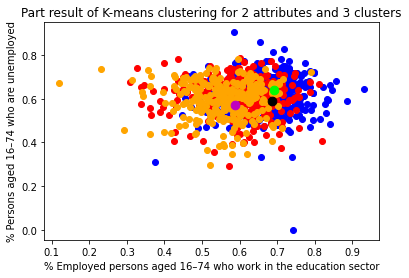

In [21]:
#plotting the results of k-means clustering
plt.scatter(filtered_label11, filtered_label12, color = 'b') #plotting clusters
#plt.scatter(filtered_label21, filtered_label22, color = 'g')
plt.scatter(filtered_label31, filtered_label32, color = 'r')
#plt.scatter(filtered_label41, filtered_label42, color = 'c')
#plt.scatter(filtered_label51, filtered_label52, color = 'm')
#plt.scatter(filtered_label61, filtered_label62, color = 'y')
plt.scatter(filtered_label71, filtered_label72, color = 'orange')
#plt.scatter(filtered_label81, filtered_label82, color = 'lime')
#plt.scatter(filtered_label91, filtered_label92, color = 'indigo')
plt.scatter(centroids[0,pc11] , centroids[0,pc22], s = 75, color = 'lime') # plotting centroids
plt.scatter(centroids[2,pc11] , centroids[2,pc22], s = 75, color = 'm')
plt.scatter(centroids[6,pc11] , centroids[6,pc22], s = 75, color = 'k')
plt.title('Part result of K-means clustering for 2 attributes and 3 clusters')
plt.ylabel('% Persons aged 16–74 who are unemployed')
plt.xlabel('% Employed persons aged 16–74 who work in the education sector')
plt.show()

In [22]:
# PAM(partitioning around medoids) Clustering, checking intertia
kmedoids = KMedoids(n_clusters=9, random_state=0).fit(dff)
pam_i = kmedoids.inertia_
pam_i

24824.239346763352

In [23]:
# Getting labels for PAM clustering
pam_labels = kmedoids.labels_
pam_c = pd.DataFrame(pam_labels)
resultp = pd.concat([resultk, pam_c], axis=1, join="inner")
resultp.rename(columns = {resultp.columns[62]:'PAM_C'}, inplace = True) # column renaming
resultp

,OA,k001_PCT,k002_PCT,k003_PCT,k004_PCT,k005_PCT,k006_PCT,k007_RATIO,k008_PCT,k009_PCT,...,k053_PCT,k054_PCT,k055_PCT,k056_PCT,k057_PCT,k058_PCT,k059_PCT,k060_PCT,KM_C,PAM_C
0,E00000001,0.606376,0.503031,0.703821,0.926061,0.762889,0.204636,0.585630,0.0,0.433226,...,0.000000,0.335744,0.924542,0.771288,0.347596,0.547130,0.655963,0.581193,8,5
1,E00000003,0.603327,0.619334,0.762261,0.935805,0.653767,0.088382,0.654158,0.0,0.458268,...,0.266650,0.344169,0.973796,0.749651,0.356319,0.384675,0.644212,0.412564,8,5
2,E00000005,0.430039,0.555673,0.801682,0.918393,0.693939,0.061004,0.621413,0.0,0.609051,...,0.180781,0.477544,0.930813,0.791375,0.400594,0.422791,0.630002,0.415685,8,5
3,E00000007,0.525310,0.448800,0.879144,0.871354,0.315906,0.000000,0.314608,0.0,0.789458,...,0.237254,0.621786,0.876786,0.924662,0.000000,0.444881,0.211712,0.437404,8,5
4,E00000010,0.516634,0.205410,0.859430,0.884819,0.670370,0.323121,0.618241,0.0,0.844328,...,0.462821,0.548348,0.861803,0.633669,0.471683,0.518480,0.497071,0.454438,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,E00176591,0.668491,0.583719,0.927328,0.677729,0.439736,0.153410,0.541190,0.0,0.703678,...,0.212514,0.624905,0.870867,0.755440,0.445596,0.512185,0.619690,0.531222,4,5
25049,E00176592,0.815300,0.658022,0.920489,0.528601,0.309879,0.000000,0.513089,0.0,0.787519,...,0.366451,0.277441,0.850513,0.781530,0.533848,0.513733,0.660739,0.560752,2,4
25050,E00176593,0.813399,0.894542,0.809166,0.759503,0.296238,0.000000,0.388428,0.0,0.490608,...,0.615219,0.466063,0.635240,0.631388,0.578778,0.527566,0.567359,0.737556,0,3
25051,E00176594,0.570961,0.775606,0.659016,0.920811,0.676941,0.000000,0.404478,0.0,0.475431,...,0.176445,0.380691,0.857743,0.719545,0.394130,0.146406,0.665710,0.634580,4,7


In [24]:
# checking numbers of features per cluster
unique, counts = np.unique(pam_labels, return_counts=True) 
dict(zip(unique, counts))

{0: 3300,
 1: 1175,
 2: 2617,
 3: 2421,
 4: 3930,
 5: 3149,
 6: 3044,
 7: 2578,
 8: 2839}

In [25]:
# Agglomerative hierarchical clustering
ahc = AgglomerativeClustering(linkage='ward', n_clusters = 9).fit(dff)

In [26]:
# Getting labels for AH clustering
ahc_labels = ahc.labels_
ahc_c = pd.DataFrame(ahc_labels)
unique, counts = np.unique(ahc_labels, return_counts=True)
dict(zip(unique, counts))
resulta = pd.concat([resultp, ahc_c], axis=1, join="inner")
resulta.rename(columns = {resulta.columns[63]:'AHC_C'}, inplace = True) # column renaming
resulta

,OA,k001_PCT,k002_PCT,k003_PCT,k004_PCT,k005_PCT,k006_PCT,k007_RATIO,k008_PCT,k009_PCT,...,k054_PCT,k055_PCT,k056_PCT,k057_PCT,k058_PCT,k059_PCT,k060_PCT,KM_C,PAM_C,AHC_C
0,E00000001,0.606376,0.503031,0.703821,0.926061,0.762889,0.204636,0.585630,0.0,0.433226,...,0.335744,0.924542,0.771288,0.347596,0.547130,0.655963,0.581193,8,5,4
1,E00000003,0.603327,0.619334,0.762261,0.935805,0.653767,0.088382,0.654158,0.0,0.458268,...,0.344169,0.973796,0.749651,0.356319,0.384675,0.644212,0.412564,8,5,4
2,E00000005,0.430039,0.555673,0.801682,0.918393,0.693939,0.061004,0.621413,0.0,0.609051,...,0.477544,0.930813,0.791375,0.400594,0.422791,0.630002,0.415685,8,5,4
3,E00000007,0.525310,0.448800,0.879144,0.871354,0.315906,0.000000,0.314608,0.0,0.789458,...,0.621786,0.876786,0.924662,0.000000,0.444881,0.211712,0.437404,8,5,4
4,E00000010,0.516634,0.205410,0.859430,0.884819,0.670370,0.323121,0.618241,0.0,0.844328,...,0.548348,0.861803,0.633669,0.471683,0.518480,0.497071,0.454438,8,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,E00176591,0.668491,0.583719,0.927328,0.677729,0.439736,0.153410,0.541190,0.0,0.703678,...,0.624905,0.870867,0.755440,0.445596,0.512185,0.619690,0.531222,4,5,0
25049,E00176592,0.815300,0.658022,0.920489,0.528601,0.309879,0.000000,0.513089,0.0,0.787519,...,0.277441,0.850513,0.781530,0.533848,0.513733,0.660739,0.560752,2,4,4
25050,E00176593,0.813399,0.894542,0.809166,0.759503,0.296238,0.000000,0.388428,0.0,0.490608,...,0.466063,0.635240,0.631388,0.578778,0.527566,0.567359,0.737556,0,3,2
25051,E00176594,0.570961,0.775606,0.659016,0.920811,0.676941,0.000000,0.404478,0.0,0.475431,...,0.380691,0.857743,0.719545,0.394130,0.146406,0.665710,0.634580,4,7,0


In [27]:
# checking numbers of features per cluster
unique, counts = np.unique(ahc_labels, return_counts=True)
dict(zip(unique, counts))

{0: 4188,
 1: 4616,
 2: 4317,
 3: 3030,
 4: 2622,
 5: 1627,
 6: 1828,
 7: 1530,
 8: 1295}

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


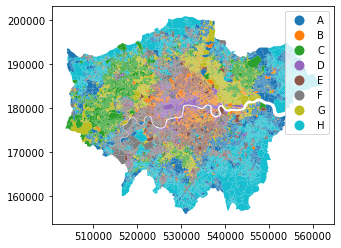

In [28]:
# Geodata visualisation
import geopandas
london = geopandas.read_file('C:/Users/Jared/Dropbox/STUDY/Semester2/ML/Project/OAC/London/Shapefiles/LOAC_London.shp')
london.head()
london.plot(column='supgrp_cd', legend = True);
#'supgrp_cd'

In [29]:
resulta.rename(columns = {resulta.columns[0]:'oa_code'}, inplace = True) # column renaming
merg = london.merge(resulta, on='oa_code', how='left')

In [30]:
merg

,SP_ID,oa_code,supgrp_cd,grp_cd,geometry,k001_PCT,k002_PCT,k003_PCT,k004_PCT,k005_PCT,...,k054_PCT,k055_PCT,k056_PCT,k057_PCT,k058_PCT,k059_PCT,k060_PCT,KM_C,PAM_C,AHC_C
0,1,E00023264,C,C3,"POLYGON ((527635.452 171810.058, 527495.957 17...",0.655567,0.733280,0.788337,0.809438,0.616867,...,0.565354,0.693873,0.607090,0.478002,0.509235,0.638862,0.662914,7,8,1
1,2,E00003359,F,F1,"POLYGON ((543581.516 171132.486, 543704.000 17...",0.747233,0.539689,0.833211,0.720010,0.659997,...,0.750254,0.730786,0.669715,0.548814,0.621092,0.667940,0.558571,4,5,0
2,3,E00023266,B,B1,"POLYGON ((526613.539 171839.165, 526546.840 17...",0.689326,0.758308,0.780265,0.787414,0.633875,...,0.551503,0.630910,0.562070,0.614731,0.500493,0.624021,0.682385,1,2,3
3,4,E00020264,B,B3,"POLYGON ((533563.521 179695.146, 533351.118 17...",0.749280,0.701306,0.841211,0.773311,0.432955,...,0.413096,0.740138,0.831888,0.726281,0.377247,0.517599,0.540406,1,4,3
4,5,E00023263,G,G1,"POLYGON ((527822.000 172020.000, 527979.000 17...",0.716956,0.743201,0.823621,0.783315,0.621155,...,0.372115,0.741299,0.555038,0.692244,0.524108,0.657307,0.614341,3,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,25049,E00004047,H,H1,"POLYGON ((539163.316 168360.071, 539026.000 16...",0.724837,0.829887,0.729548,0.830732,0.671271,...,0.442976,0.794772,0.671424,0.597979,0.543308,0.601241,0.612840,6,7,5
25049,25050,E00007044,C,C4,"POLYGON ((528811.000 195161.000, 528814.206 19...",0.550697,0.657060,0.712646,0.864121,0.743989,...,0.577032,0.781733,0.631653,0.433666,0.430420,0.682715,0.655782,6,7,1
25050,25051,E00003854,H,H2,"POLYGON ((546965.963 166027.878, 546947.923 16...",0.490745,0.784809,0.665139,0.840187,0.804812,...,0.325757,0.688830,0.750479,0.494647,0.445786,0.603212,0.637289,6,6,8
25051,25052,E00014344,D,D1,"POLYGON ((527325.087 178641.434, 527321.728 17...",0.382034,0.188882,0.887802,0.771920,0.544407,...,0.563276,0.872324,0.831354,0.533579,0.220711,0.510602,0.441247,8,4,4


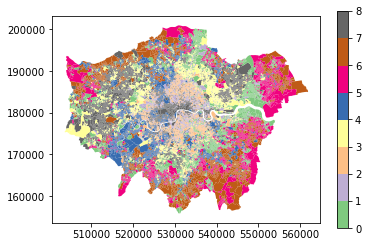

In [31]:
# km plotting
merg.plot(column='KM_C', cmap="Accent", legend = True);

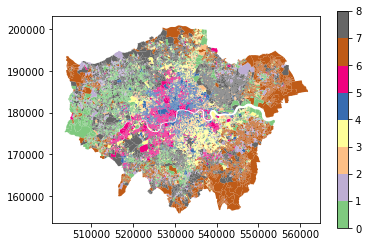

In [32]:
# pam plotting
merg.plot(column='PAM_C', cmap="Accent", legend = True);

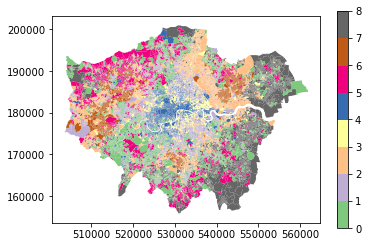

In [33]:
# Agglomerative hierarchical clustering plotting
merg.plot(column='AHC_C', cmap="Accent", legend = True);

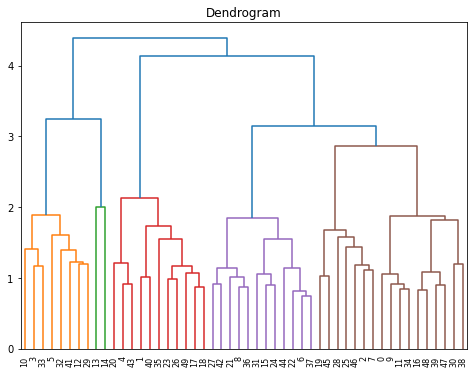

In [69]:
import scipy.cluster.hierarchy as shc
dfahc = dff.sample(n=50)
plt.figure(figsize=(8, 6))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(dfahc, method='ward'))